In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [102]:
df = pd.read_csv("Mall.csv")

In [103]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [105]:
df['Genre'] = LabelEncoder().fit_transform(df['Genre'])

In [106]:
df.drop('CustomerID', axis=1, inplace=True)

In [107]:
df.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [108]:
cluster_dataset = StandardScaler().fit_transform(df)

In [109]:
his = dict()
for n in range(1, 18):
    k_means = KMeans( n_clusters=n)
    k_means.fit(cluster_dataset)
    labels = k_means.labels_
    his[n] = k_means.inertia_

C:\Users\theta\Anaconda3\envs\py36\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0.5, 1.0, 'Elbow method')

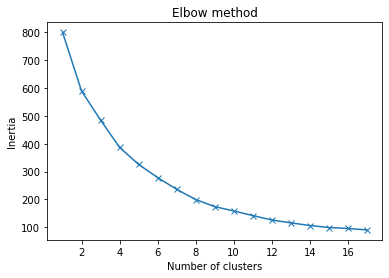

In [110]:

plt.plot(list(his.keys())[:], list(his.values())[:], 'x-')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow method")

With Elbow method, we should choose the number of cluster is 4.

In [111]:
n = 4
k_means = KMeans(n_clusters=n)
k_means.fit(cluster_dataset)
labels = k_means.labels_
print(labels)

[1 1 0 3 0 3 0 3 2 3 2 3 0 3 2 1 0 1 2 3 2 1 0 1 0 1 0 1 0 3 2 3 2 1 0 3 0
 3 0 3 0 1 2 3 0 3 0 3 3 3 0 1 3 2 0 2 0 2 3 2 2 1 0 0 2 1 0 0 1 3 2 0 0 0
 2 1 0 2 3 0 2 1 2 0 3 2 0 3 3 0 0 1 2 0 3 1 0 3 2 1 3 0 2 1 2 3 0 2 2 2 2
 3 0 1 3 3 0 0 0 0 1 0 3 1 3 3 2 1 2 1 2 1 3 3 2 3 0 1 2 3 0 1 3 3 2 1 2 3
 0 1 2 1 0 3 0 3 2 3 2 3 0 3 2 3 2 3 2 3 0 1 2 1 2 1 0 3 2 1 2 1 0 3 2 3 0
 1 0 1 0 3 0 3 2 3 0 3 0 1 2 1]


In [112]:
df["cluster"] = labels

In [113]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0


We can easily see the centroid values by averaging the values of each cluster.

In [114]:
df.groupby('cluster').mean()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,0,47.803571,58.071429,34.875000
1,1,28.250000,62.000000,71.675000
2,1,49.437500,62.416667,29.208333
3,0,28.392857,60.428571,68.178571


In [115]:
X = df.iloc[:, 1:].values

In [124]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

def plot_3d(elev, azim):
    fig = plt.figure(1, figsize=(8, 6))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    plt.cla()
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income (k$)')
    ax.set_zlabel('Spending Score (1-100)')
    ax.scatter(X[:, 1], X[:, 2], X[:, 3], c= labels.astype(np.float))
    plt.show()

interact(plot_3d, elev=(-90, 90, 1), azim=(-180, 180, 1))

interactive(children=(IntSlider(value=0, description='elev', max=90, min=-90), IntSlider(value=0, description=…

<function __main__.plot_3d(elev, azim)>